<div>
  <h1>COVID-19: A Global Health Crisis</h1>
  <p>
    COVID-19, caused by the novel coronavirus SARS-CoV-2, emerged in December 2019 in Wuhan, China. The virus spread rapidly worldwide, leading to a global pandemic. It primarily spreads through respiratory droplets when an infected person coughs, sneezes, or talks.
  </p>
  <h2>Symptoms and Prevention</h2>
  <p>
    Common symptoms include fever, cough, shortness of breath, and fatigue. Some individuals may experience loss of taste or smell, while others remain asymptomatic. Preventive measures include wearing masks, practicing social distancing, and frequent handwashing.
  </p>
  <h2>Impact</h2>
  <p>
    COVID-19 has led to millions of infections and deaths worldwide, with significant impacts on global economies, healthcare systems, and daily life. Vaccination efforts have been critical in controlling the spread, with multiple vaccines now available.
  </p>
</div>


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mehradaria/covid19-lung-ct-scans")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mehradaria/covid19-lung-ct-scans/versions/1


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data_dir =path +  "/COVID-19_Lung_CT_Scans"

In [ ]:
categories = ["COVID-19", "Non-COVID-19"]
data = []
valid_extensions = {".jpg", ".jpeg", ".png", ".bmp"}

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Explanation of Python Code</title>
</head>
<body>
    <h1>Explanation of Python Code</h1>
    <p>This Python code processes images from a directory, resizes them, and associates them with class labels. Here's a line-by-line breakdown:</p>

<h2>1. Loop through categories:</h2>
    <pre><code>for category in categories:</code></pre>
    <p>This line iterates over each category in a predefined list called <code>categories</code>, which represents different image categories in the dataset.</p>

<h2>2. Create file path for category:</h2>
    <pre><code>path = os.path.join(data_dir, category)</code></pre>
    <p>This line creates a full file path by joining the base directory (<code>data_dir</code>) and the current category's name. This path will point to the folder containing images for that category.</p>

<h2>3. Assign a class label:</h2>
    <pre><code>class_label = categories.index(category)</code></pre>
    <p>This line assigns a numerical label to each category. The label is determined by the index of the category in the <code>categories</code> list.</p>

<h2>4. Loop through images in the category folder:</h2>
    <pre><code>for img_name in os.listdir(path):</code></pre>
    <p>This line loops through all the files in the directory for the current category.</p>

<h2>5. Check if the image file is valid:</h2>
    <pre><code>if not any(img_name.lower().endswith(ext) for ext in valid_extensions):</code></pre>
    <p>This checks if the file has a valid image extension by comparing the file extension with a list of <code>valid_extensions</code>. If the file doesn't match any valid extension, it skips the file.</p>

<h2>6. Construct the full path for the image:</h2>
    <pre><code>img_path = os.path.join(path, img_name)</code></pre>
    <p>This creates the full file path for the image by joining the category folder path and the image's name.</p>

<h2>7. Read the image as grayscale:</h2>
    <pre><code>img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)</code></pre>
    <p>This reads the image in grayscale mode using the OpenCV library (<code>cv2</code>). If the image cannot be read, it returns <code>None</code>.</p>

<h2>8. Handle failed image read:</h2>
    <pre><code>if img is None:</code></pre>
    <p>This checks if the image could not be loaded (i.e., <code>img</code> is <code>None</code>). If true, it prints an error message and skips to the next image.</p>

<h2>9. Resize the image:</h2>
    <pre><code>img = cv2.resize(img, (128, 128))</code></pre>
    <p>This resizes the image to 128x128 pixels for uniformity, as neural networks typically require consistent image sizes.</p>

<h2>10. Add image and label to data list:</h2>
    <pre><code>data.append((img, class_label))</code></pre>
    <p>This appends the resized image and its associated class label as a tuple to the <code>data</code> list.</p>

<h2>11. Handle any errors:</h2>
    <pre><code>except Exception as e:</code></pre>
    <p>If an error occurs during the image processing (such as file read issues), this block catches the error and prints an error message with the image name.</p>
</body>
</html>


In [ ]:
for category in categories:
    path = os.path.join(data_dir, category)
    class_label = categories.index(category)
    for img_name in os.listdir(path):
        try:
            if not any(img_name.lower().endswith(ext) for ext in valid_extensions):
                continue
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                print(f"Image {img_name} Did not read")
                continue
            img = cv2.resize(img, (128, 128))
            data.append((img, class_label))
        except Exception as e:
            print(f"Error{img_name}: {e}")

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Explanation of Python Code</title>
</head>
<body>
    <h1>Explanation of Python Code 2</h1>
    <p>This Python code extracts image data and labels, converts them into numpy arrays, and then prints the number of images processed. Here's a line-by-line breakdown:</p>

<h2>1. Unzip the data into images and labels:</h2>
    <pre><code>images, labels = zip(*data)</code></pre>
    <p>This line unpacks the <code>data</code> list (which contains tuples of images and labels) into two separate lists: <code>images</code> and <code>labels</code>. The <code>zip(*data)</code> function separates the tuples into two groups — one for the images and one for the labels.</p>

<h2>2. Convert images and labels to numpy arrays:</h2>
    <pre><code>images = np.array(images)</code></pre>
    <pre><code>labels = np.array(labels)</code></pre>
    <p>Here, the images and labels are converted into numpy arrays using the <code>np.array()</code> function. This is done for efficient numerical operations and is often required for machine learning tasks.</p>

<h2>3. Print the number of images:</h2>
    <pre><code>print(f"Number of images: {len(images)}")</code></pre>
    <p>This line prints the number of images by determining the length of the <code>images</code> array using <code>len()</code>. The result is displayed in the console as a message.</p>
</body>
</html>


In [ ]:
images, labels = zip(*data)
images = np.array(images)
labels = np.array(labels)

print(f"Number of images: {len(images)}")

Number of images: 8439


## Sample an image

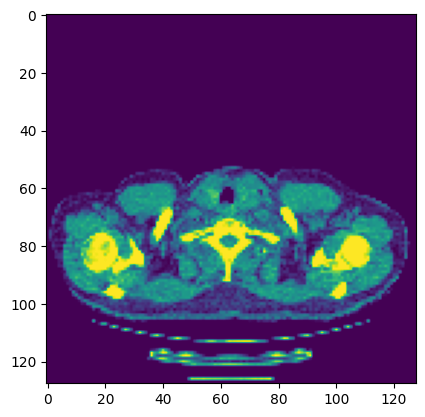

In [ ]:
plt.imshow(images[0])

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Explanation of Python Code</title>
</head>
<body>
    <h1>Explanation of Python Code 3</h1>
    <p>This Python code defines a function that preprocesses images by applying noise reduction, contrast enhancement, and normalization. Here's a line-by-line breakdown:</p>

<h2>1. Define the function preprocess_images:</h2>
    <pre><code>def preprocess_images(images):</code></pre>
    <p>This line defines a function named <code>preprocess_images</code> that takes a list of images as input and returns a list of preprocessed images.</p>

<h2>2. Initialize an empty list for preprocessed images:</h2>
    <pre><code>preprocessed_images = []</code></pre>
    <p>An empty list <code>preprocessed_images</code> is initialized to store the processed images.</p>

<h2>3. Loop through each image in the input list:</h2>
    <pre><code>for img in images:</code></pre>
    <p>This line starts a loop to iterate over each image in the input list <code>images</code>.</p>

<h2>4. Apply Gaussian Blur to remove noise:</h2>
    <pre><code>denoised = cv2.GaussianBlur(img, (5, 5), 0)</code></pre>
    <p>This applies a Gaussian Blur filter to the image using OpenCV's <code>GaussianBlur</code> function. The blur helps reduce noise in the image, which is important for improving subsequent image processing steps.</p>

<h2>5. Apply Contrast Limited Adaptive Histogram Equalization (CLAHE):</h2>
    <pre><code>clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))</code></pre>
    <p>This line creates a CLAHE object with a <code>clipLimit</code> of 2.0 and a <code>tileGridSize</code> of (8, 8). CLAHE is used to improve the contrast of the image.</p>

<h2>6. Apply CLAHE to the denoised image:</h2>
    <pre><code>contrast = clahe.apply(denoised)</code></pre>
    <p>This applies the CLAHE technique to the denoised image to enhance the contrast in the image.</p>

<h2>7. Normalize the contrast-enhanced image:</h2>
    <pre><code>normalized = contrast / 255.0</code></pre>
    <p>This normalizes the contrast-enhanced image by dividing each pixel value by 255.0, which scales the pixel values to the range [0, 1]. This step is common in image preprocessing to prepare the data for machine learning models.</p>

<h2>8. Append the preprocessed image to the list:</h2>
    <pre><code>preprocessed_images.append(normalized)</code></pre>
    <p>This line appends the preprocessed image to the <code>preprocessed_images</code> list.</p>

<h2>9. Handle exceptions in case of errors:</h2>
    <pre><code>except Exception as e:</code></pre>
    <p>If an error occurs during any of the preprocessing steps, the error is caught by this block, and an error message is printed.</p>

<h2>10. Return the preprocessed images:</h2>
    <pre><code>return np.array(preprocessed_images)</code></pre>
    <p>Finally, the function returns the list of preprocessed images as a numpy array for further use in machine learning or analysis.</p>
</body>
</html>


In [ ]:
def preprocess_images(images):
    preprocessed_images = []
    for img in images:
        try:
            denoised = cv2.GaussianBlur(img, (5, 5), 0)
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
            contrast = clahe.apply(denoised)
            normalized = contrast / 255.0
            preprocessed_images.append(normalized)
        except Exception as e:
            print(f"Error in image preprocessing: {e}")
    return np.array(preprocessed_images)

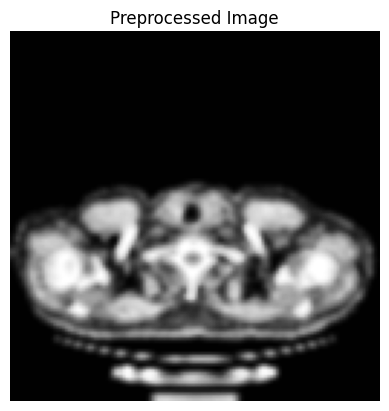

In [ ]:
preprocessed_images = preprocess_images(images)

len(preprocessed_images)

plt.imshow(preprocessed_images[0], cmap='gray')
plt.title("Preprocessed Image")
plt.axis("off")
plt.show()

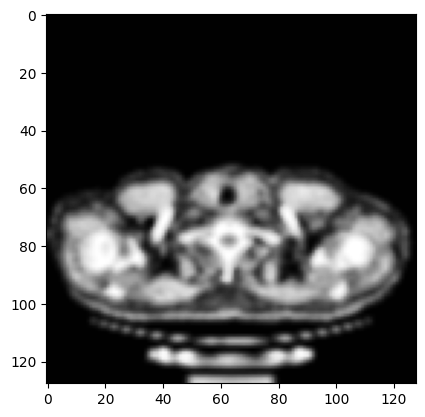

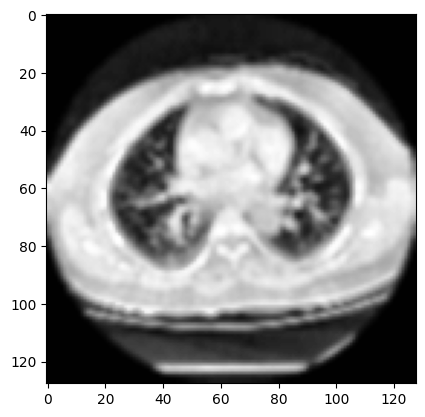

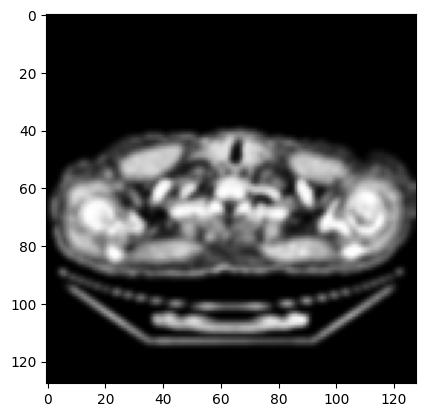

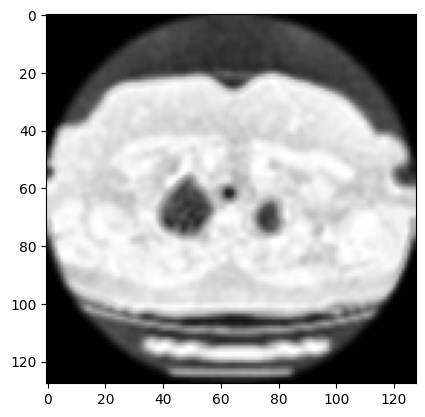

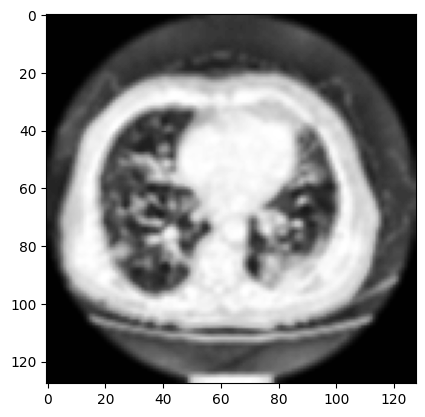

In [ ]:
for i in range(5):
    plt.imshow(preprocessed_images[i] , cmap='gray')
    plt.show()

# Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    preprocessed_images,
    labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)

In [ ]:
print(f"Number of train images: {len(X_train)}")
print(f"Number of test images {len(X_test)}")

Number of train images: 6751
Number of test images 1688


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Explanation of Python Code</title>
</head>
<body>
    <h1>Explanation of Python Code</h1>
    <p>This Python code computes the number of samples of each class in the training and test datasets. It uses <code>numpy</code> to get unique values and counts for the labels and then prints the results. Here's a line-by-line breakdown:</p>

<h2>1. Get unique values and counts in the training set:</h2>
    <pre><code>unique, counts = np.unique(y_train, return_counts=True)</code></pre>
    <p>This line uses the <code>np.unique()</code> function to find the unique class labels in the <code>y_train</code> array (training set labels) and the count of each unique label. The <code>return_counts=True</code> argument ensures that it returns the count of occurrences of each unique value.</p>

<h2>2. Print the number of examples of each class in the training set:</h2>
    <pre><code>print(f"The number of examples of each class in training: {dict(zip(unique, counts))}")</code></pre>
    <p>This line prints the number of examples (samples) for each class in the training set. The <code>zip(unique, counts)</code> combines the unique class labels with their corresponding counts, and <code>dict()</code> converts them into a dictionary for better readability.</p>

<h2>3. Get unique values and counts in the test set:</h2>
    <pre><code>unique, counts = np.unique(y_test, return_counts=True)</code></pre>
    <p>Similarly, this line computes the unique class labels and their counts in the <code>y_test</code> array (test set labels), using the same <code>np.unique()</code> function as before.</p>

<h2>4. Print the number of samples of each class in the test set:</h2>
    <pre><code>print(f"The number of samples of each class in the test: {dict(zip(unique, counts))}")</code></pre>
    <p>This line prints the number of samples (examples) for each class in the test set, following the same approach as the training set and converting the output to a dictionary format.</p>
</body>
</html>


In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
print(f"The number of examples of each class in training: {dict(zip(unique, counts))}")

unique, counts = np.unique(y_test, return_counts=True)
print(f"The number of samples of each class in the test: {dict(zip(unique, counts))}")


The number of examples of each class in training: {0: 5996, 1: 755}
The number of samples of each class in the test: {0: 1499, 1: 189}


# Loading the model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Explanation of Python Code</title>
</head>
<body>
    <h1>Explanation of Python Code</h1>
    <p>This Python code converts the class labels in the training and test datasets into one-hot encoded format. Here's a breakdown of each line:</p>

<h2>1. One-hot encode the training labels:</h2>
    <pre><code>y_train_onehot = to_categorical(y_train)</code></pre>
    <p>This line uses the <code>to_categorical()</code> function from Keras to convert the class labels in the <code>y_train</code> array into a one-hot encoded format. In this format, each class label is represented by a vector where only the index corresponding to the class is set to 1, and all other indices are set to 0.</p>

<h2>2. One-hot encode the test labels:</h2>
    <pre><code>y_test_onehot = to_categorical(y_test)</code></pre>
    <p>Similarly, this line converts the class labels in the <code>y_test</code> array into a one-hot encoded format using the <code>to_categorical()</code> function. This is important for multi-class classification tasks where the model needs to predict one class among many, and the one-hot encoding format is the standard way to represent the target labels.</p>
</body>
</html>


In [ ]:
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Explanation of Python Code</title>
</head>
<body>
    <h1>Explanation of Python Code</h1>
    <p>This Python code computes the class weights for a dataset to handle imbalanced classes. The class weights are computed using the <code>compute_class_weight()</code> function from <code>sklearn.utils.class_weight</code> and then stored in a dictionary format. Here's a breakdown of each line:</p>

<h2>1. Compute class weights:</h2>
    <pre><code>class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)</code></pre>
    <p>This line computes the class weights using the <code>compute_class_weight()</code> function. The arguments are as follows:
        <ul>
            <li><code>class_weight='balanced'</code>: This tells the function to compute the class weights in such a way that each class contributes equally to the model's loss function, compensating for imbalances in the dataset.</li>
            <li><code>classes=np.unique(y_train)</code>: This provides the unique class labels in the training data <code>y_train</code> to the function.</li>
            <li><code>y=y_train</code>: This provides the actual class labels in the training set to compute the weights.</li>
        </ul>
        The function returns an array of class weights that are used to address class imbalances during model training.</p>

 <h2>2. Convert class weights to a dictionary format:</h2>
    <pre><code>class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}</code></pre>
    <p>This line converts the array of class weights into a dictionary where the keys are the class labels (from 0 to n_classes - 1), and the values are the corresponding weights computed in the previous step.</p>

<h2>3. Print the class weights:</h2>
    <pre><code>print("class_weights:", class_weights_dict)</code></pre>
    <p>This line prints the computed class weights in dictionary format, allowing you to visualize how much weight each class will have during model training.</p>
</body>
</html>


In [ ]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
print("class_weights:", class_weights_dict)

class_weights: {0: 0.5629586390927285, 1: 4.470860927152318}


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Explanation of Python Code</title>
</head>
<body>
    <h1>Explanation of Python Code</h1>
    <p>This Python code defines a Convolutional Neural Network (CNN) model using the <code>Sequential</code> API from Keras. The model includes convolutional layers, max pooling layers, and fully connected layers. Here's a breakdown of each component:</p>

<h2>1. Define the model using <code>Sequential</code> API:</h2>
    <pre><code>model = Sequential([</code></pre>
    <p>The <code>Sequential</code> API in Keras allows you to stack layers in a linear fashion. This line starts the definition of the model using the <code>Sequential</code> container.</p>

<h2>2. First Convolutional Layer:</h2>
    <pre><code>Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1))</code></pre>
    <p>This is the first convolutional layer of the model:
        <ul>
            <li><code>32</code>: The number of filters (kernels) in this convolutional layer.</li>
            <li><code>(3, 3)</code>: The size of the convolutional filter (3x3).</li>
            <li><code>activation='relu'</code>: The activation function used is ReLU (Rectified Linear Unit), which introduces non-linearity to the model.</li>
            <li><code>input_shape=(128, 128, 1)</code>: This defines the input shape for the model. The input images are of size 128x128 pixels with 1 channel (grayscale).</li>
        </ul>
    </p>

<h2>3. First Max Pooling Layer:</h2>
    <pre><code>MaxPooling2D((2, 2))</code></pre>
    <p>This is the first max pooling layer:
        <ul>
            <li><code>(2, 2)</code>: This defines the pool size (2x2), which reduces the spatial dimensions of the feature map (downsampling).</li>
        </ul>
    </p>

<h2>4. Second Convolutional Layer:</h2>
    <pre><code>Conv2D(64, (3, 3), activation='relu')</code></pre>
    <p>This is the second convolutional layer:
        <ul>
            <li><code>64</code>: The number of filters (kernels) in this convolutional layer.</li>
            <li><code>(3, 3)</code>: The size of the convolutional filter (3x3).</li>
            <li><code>activation='relu'</code>: The activation function is ReLU.</li>
        </ul>
    </p>

<h2>5. Second Max Pooling Layer:</h2>
    <pre><code>MaxPooling2D((2, 2))</code></pre>
    <p>This is the second max pooling layer, similar to the first one, which downsamples the feature map.</p>

<h2>6. Flatten Layer:</h2>
    <pre><code>Flatten()</code></pre>
    <p>The <code>Flatten()</code> layer flattens the 2D feature map into a 1D vector, which is required to feed the fully connected layers.</p>

<h2>7. Fully Connected Layer:</h2>
    <pre><code>Dense(128, activation='relu')</code></pre>
    <p>This is a fully connected layer (dense layer) with 128 neurons and ReLU activation. This layer connects all the neurons from the previous layer to this one.</p>

<h2>8. Dropout Layer:</h2>
    <pre><code>Dropout(0.5)</code></pre>
    <p>The <code>Dropout</code> layer randomly sets 50% of the neurons to 0 during training to prevent overfitting. The dropout rate is 0.5.</p>

<h2>9. Output Layer:</h2>
    <pre><code>Dense(2, activation='softmax')</code></pre>
    <p>The final output layer has 2 neurons (for binary classification) and uses the <code>softmax</code> activation function, which is commonly used for multi-class classification problems, but works for binary classification as well by outputting probabilities for each class.</p>

<h2>10. End of model definition:</h2>
    <pre><code>])</code></pre>
    <p>This ends the definition of the model. The <code>Sequential</code> container now contains the entire architecture of the CNN.</p>
</body>
</html>


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Explanation of Python Code</title>
</head>
<body>
    <h1>Explanation of Python Code</h1>
    <p>This Python code compiles the Keras model using the <code>compile()</code> method. The <code>compile()</code> method configures the model for training by specifying the optimizer, loss function, and evaluation metric(s). Here's a breakdown of each parameter:</p>

<h2>1. Optimizer:</h2>
    <pre><code>optimizer='adam'</code></pre>
    <p>The <code>optimizer='adam'</code> specifies the Adam optimization algorithm. Adam (Adaptive Moment Estimation) is an efficient optimization method that combines the benefits of both AdaGrad and RMSProp. It adapts the learning rate for each parameter during training and is commonly used for training deep learning models.</p>

<h2>2. Loss Function:</h2>
    <pre><code>loss='categorical_crossentropy'</code></pre>
    <p>The <code>loss='categorical_crossentropy'</code> specifies the loss function to be used. In this case, <code>categorical_crossentropy</code> is used, which is suitable for multi-class classification problems. This loss function measures the difference between the true class labels and the predicted probabilities of each class.</p>

<h2>3. Evaluation Metric:</h2>
    <pre><code>metrics=['accuracy']</code></pre>
    <p>The <code>metrics=['accuracy']</code> specifies that the model's performance will be evaluated based on accuracy. Accuracy is the fraction of predictions the model gets correct, and it is a commonly used evaluation metric for classification tasks.</p>

<h2>4. Model Compilation:</h2>
    <pre><code>model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])</code></pre>
    <p>By calling <code>model.compile()</code>, the model is now ready for training. The optimizer will update the model's weights based on the computed gradients, the loss function will guide the optimization process, and accuracy will be tracked as the evaluation metric during training.</p>
</body>
</html>

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Fitting the model

In [ ]:
history = model.fit(
    X_train,
    y_train_onehot,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test_onehot),
    class_weight=class_weights_dict     )

Epoch 1/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.7540 - loss: 0.6179 - val_accuracy: 0.8531 - val_loss: 0.2930
Epoch 2/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9378 - loss: 0.1742 - val_accuracy: 0.9751 - val_loss: 0.0914
Epoch 3/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9732 - loss: 0.0967 - val_accuracy: 0.9733 - val_loss: 0.0884
Epoch 4/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9867 - loss: 0.0413 - val_accuracy: 0.9870 - val_loss: 0.0424
Epoch 5/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9916 - loss: 0.0253 - val_accuracy: 0.9953 - val_loss: 0.0192
Epoch 6/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9965 - loss: 0.0126 - val_accuracy: 0.9911 - val_loss: 0.0295
Epoch 7/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9872 - loss: 0.0388 - val_accuracy: 0.9935 - val_loss: 0.0275
Epoch 8/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9916 - loss: 0.0231 - val_acc

# Test on test data

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot)
print(f" test_accuracy  {test_accuracy * 100:.2f}%")

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9953 - loss: 0.0201
 test_accuracy  99.47%


# Plotting the accuracy and loss


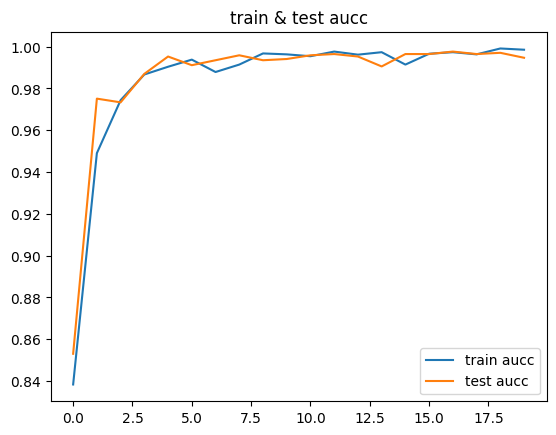

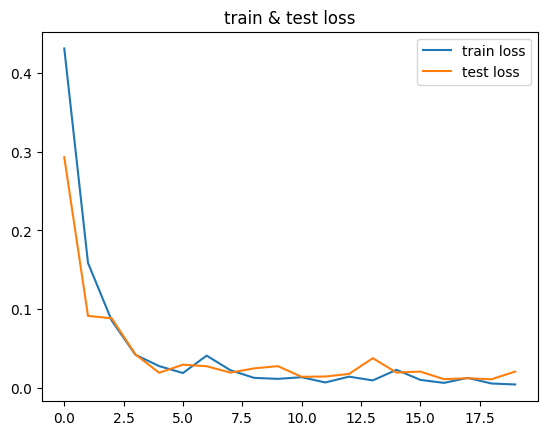

In [ ]:
plt.plot(history.history['accuracy'], label='train aucc')
plt.plot(history.history['val_accuracy'], label='test aucc')
plt.legend()
plt.title("train & test aucc")
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.title("train & test loss")
plt.show()